---

# calf turtorial

---

`According to the moment-0 image, you can manuuly draw a polygon region for the outflow lobe (see Cell-2), then compute the mass, momentum, energy, flux, and molecular column density of the ourflow lobe.` 


`You can also save the polygon mask, and mass/momentum/energy/flux/density map (see Cell-6).`

In [118]:
import io
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
from calcu import calf, roipoly, immoment0, headinfo 
# %pylab inline

In [8]:
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
path = '../Tutorial_Data/'
fname0 =  path+'CO_cube_12m.fits'
## primary beam correction 
fname1 =  path+'CO_cube_12m_pb.fits'

##------------------------------------
Tex = 14.     # K
D = 5.42      #kpc
decl = 0.     # declination of source (degree)
line = 'CO'   # molecular name, e.g., CO, 13CO, C17O, C18O, SiO...
J = '2-1'         # rotational quantum number of the upper state; here J=2 means trnasition J=2-1
Xmol = 1e-4   # the fractional abundance of molecule relative to H2
tau = 0.      # optical depth 
#-----------------------------------------------------------
vsys = -88            # the core's systemic velovity in km/s
v_low = -110          # km/s
v_upp = -98

# v_low = -82.86       # km/s
# v_upp = -70.15

#--------------------------------- 
fname = fname0
hduinfo = headinfo(fname)
imm = immoment0(fname, vl=v_low, vu=v_upp)
rms = 5e-3 * ((imm.vu-imm.vl)*imm.onevpix)**0.5  # rms of moment-0 map
c_levs=np.arange(6,100,6)  # the contours level
# print('rms_mom0=%s'%(rms))

%matplotlib qt5  
ticksize = 13
# xlim = [0, 90]
# ylim = [0, 60]
figsize = (12,12)
fig, ax1 = plt.subplots(1, figsize=figsize)
ax1 = plt.subplot(1,1,1, projection=hduinfo.wcs2d)
plt.imshow(imm.mom0, interpolation='nearest', cmap="RdBu_r")
plt.colorbar(fraction=.03, pad=0.005, shrink=1, label='Jy beam$^{-1}$ km s$^{-1}$')
plt.contour(imm.mom0, c_levs*rms, colors='k', linewidths=0.8) 
ax1.coords[0].set_axislabel('R.A. [J2000]',fontsize=20)
ax1.coords[0].set_major_formatter('hh:mm:ss')
ax1.coords[1].set_axislabel('Dec. [J2000]',fontsize=20)
ax1.coords[1].set_major_formatter('dd:mm:ss')
ax1.coords[0].set_ticklabel(size=ticksize)
ax1.coords[1].set_ticklabel(size=ticksize)
# ax1.set_xlim(xlim[0], xlim[1])
# ax1.set_ylim(ylim[0], ylim[1])
##--------------------------------------
## draw a polygon for the outflow lobe
## Click the cross toolbar, then press right mouse button to zoom.
plt.title('left click: line segment         right click: close region', color='k', size=15)
ROI1 = roipoly(roicolor='r')
plt.show()


major_beam=1.5112192630767805 minor_beam=1.2206674814224212
Jyperbeam_to_K = 12.464
----------------------
starting velocity -110 km/s at channel 7
ending velocity   -98 km/s at channel 26


- **fname** -- the molecular line datacube.

- **mask** -- the mask can be give as boolean or int type in 2D numpy.array or 2D-image fits. Default is not mask applied to the datacube.

- **pb** -- the pb should be give as a single value (float), 2D numpy.array, 2D-image or 3D-image fits. Default is not primary beam correction applied to the datacube.

- **D** -- source distance in kpc.

- **Tex** -- excitation temprature; A single value (float), or 2D numpy.array or 2D-image fits.

- **vlsr** -- the source systemic velovity in km/s.

- **vl** -- the staring velocity in km/s.

- **vu** -- the ending velocity in km/s.

- **line** -- molecular name, e.g., CO, 13CO, C17O, C18O, SiO, HCOp, DCN, DCOp; you can `import line_info` then `help(line_info)` to see what kind of molercules are available.

- **J** -- quantum numbers of the upper state; here J='2-1' means trnasition J=2-1.

- **Xmol** -- the fractional abundance of molecule relative to H2; e.g., Xmol=1e-4 for 12CO 

- **decl** -- source declination in degree.

- **tau** -- optical depth; the tau will be used to correct the optical depth effect in colum density if tau is not zero. Defalut is 0.



In [9]:
mask0 = ROI1.getMask(imm.mom0)             # get the mask from the polygon
m12flux = np.sum(imm.mom0[mask0])          # the flux within polygon
print ("Integrated flux of the lobe {:.4f} Jy/beam km/s".format(m12flux) )
print ("------------------------------------------------------")
fname = fname0
param = calf(fname=fname, mask=mask0, pb=fname1, D=D, Tex=Tex, vlsr=vsys, 
             vl=v_low, vu=v_upp, line='CO', J=J, Xmol=Xmol, decl=decl, tau=tau)

print ("------------------------------------------------------")
print ('For velocity range from {} to {} km/s'.format( v_low, v_upp ))
print ('Total mass-------------> {} Msolar'.format( np.nansum(param.mass) ))
print ('Total momentum---------> {} Msolar km/s'.format( np.nansum(param.momentum) ))
print ('Total energy-----------> {} Msolar km^2/s^2'.format( np.nansum(param.energy) ))
print ("------------------------------------------------------")
print ('Total flux(12m)------------> {} Jy/beam km/s'.format( np.nansum(param.flux) ))
print ('Total molecular column density-> {:.3e} cm-2'.format( np.nansum(param.mocol) ))
print ('Number of included pixels------> {:d}'.format( np.sum(param.mask) ))
print ('Mean molecular column density--> {:.3e} cm-2'.format( np.nanmean(param.mocol) ))

table = Table([ [v_low], [v_upp], [vsys], [np.nansum(param.mass)], 
               [np.nansum(param.momentum)], [np.nansum(param.energy)] ], 
             names=( 'v_low', 'v_upp', 'v_upp2sys', 'mass', 'momentum', 'energy')
             ) 
table

Integrated flux of the lobe 650.9193 Jy/beam km/s
------------------------------------------------------
bmaj=1.5112, bmin=1.2207
Jyperbeam_to_K = 12.464
----------------------
starting velocity -110 km/s at channel 7
ending velocity   -98 km/s at channel 26
----------------------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
---->>> Line CO 2-1  <<<-------
------------------------------------------------------
For velocity range from

v_low,v_upp,v_upp2sys,mass,momentum,energy
int64,int64,int64,float64,float64,float64
-110,-98,-88,0.03459206390855612,0.4432838784317945,2.9910769410199665


Populating the interactive namespace from numpy and matplotlib


/home/sli/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['table', 'figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


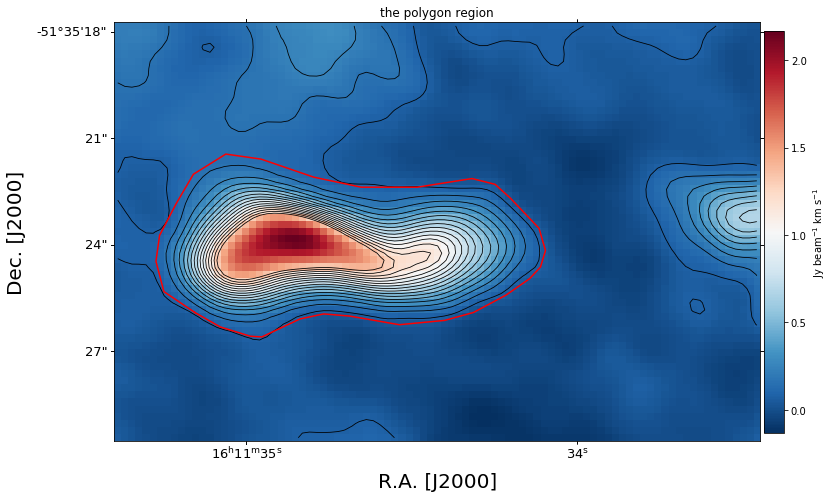

In [10]:
### plot the polygon region with the image
# %matplotlib qt5  
%pylab inline
figsize = (12,12)
fig, ax1 = plt.subplots(1, figsize=figsize)
ax1 = plt.subplot(1,1,1, projection=hduinfo.wcs2d)
plt.imshow(imm.mom0, interpolation='nearest', cmap="RdBu_r")
plt.colorbar(fraction=.03, pad=0.005, shrink=1, label='Jy beam$^{-1}$ km s$^{-1}$')
plt.contour(imm.mom0, c_levs*rms, colors='k', linewidths=0.8) 
ax1.coords[0].set_axislabel('R.A. [J2000]',fontsize=20)
ax1.coords[0].set_major_formatter('hh:mm:ss')
ax1.coords[1].set_axislabel('Dec. [J2000]',fontsize=20)
ax1.coords[1].set_major_formatter('dd:mm:ss')
ax1.coords[0].set_ticklabel(size=ticksize)
ax1.coords[1].set_ticklabel(size=ticksize)
# ax1.set_xlim(xlim[0], xlim[1])
# ax1.set_ylim(ylim[0], ylim[1])
plt.title('the polygon region')
if ROI1:
    ROI1.displayROI()
else:
    plt.contour(param.mask, [1], colors='red') 
plt.show()


Text(0, 0.5, 'I (Jy/beam)')

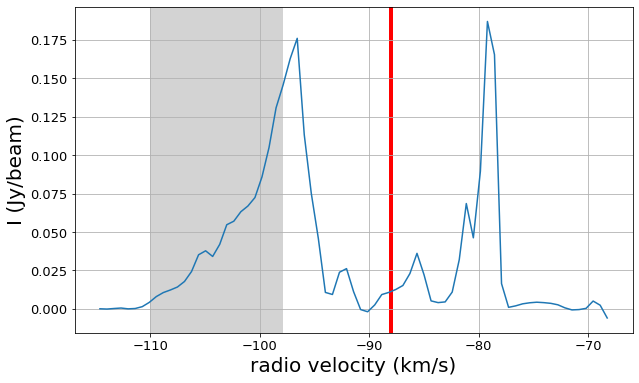

In [116]:
### plot the polygon-averaged line profile
numbchan = param.img.shape[0]
x0 = (0-hduinfo.v0pix)*hduinfo.onevpix+hduinfo.v0
x1 = (numbchan-hduinfo.v0pix)*hduinfo.onevpix+hduinfo.v0
xaxis = np.linspace(x0,x1,numbchan) #* u.km/u.s
yaxis = np.nanmean(param.img, axis=(1,2))

figsize = (10,6)
fig, ax = plt.subplots(1, figsize=figsize)
plt.plot( xaxis, yaxis)
plt.axvspan(v_low, v_upp, color='lightgrey', alpha=1)
plt.axvspan(vsys, vsys, color='red', alpha=1, linewidth=4)
plt.grid(True)
ax.axes.tick_params(axis='both',labelsize=13)
plt.xlabel(r'radio velocity (km/s)', fontsize=20)
plt.ylabel(r'I (Jy/beam)', fontsize=20)

In [6]:
# ----> save the polygon's region  <-------
# HDUList_tem = fits.PrimaryHDU(param.mask, hduinfo.head2d)
# HDUList_tem.writeto(path+'polygon_mask.fits', overwrite=True)

## also can save the maps of 'mass' (param.mass), 'momentum' (param.momentum), 
# 'energy' (param.energy), 'flux' (param.flux), and 'column density' (param.mocol).
